In [8]:
import json
import sys
from collections import Counter
from dataclasses import dataclass
from typing import List, Tuple

import cv2
import networkx as nx
import numpy as np
import scipy.ndimage.measurements
import shapely.geometry
from PIL import Image
from skimage import morphology, segmentation

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from extract_network import find_color, extract_network, render_skeleton, render_network

In [13]:
rgb = (255, 255, 255)
png_file = 'samples/gt/1_gray.png'
im = Image.open(png_file)

In [14]:
px = find_color(im, rgb).T
g = extract_network(px, 16)
print(f'Extracted street network:')
print(f'  - {len(g.nodes())} nodes')
print(f'  - {len(g.edges())} edges')

skel = morphology.skeletonize(px)
skel_path = png_file.replace('.png', '.skel.png')
img_skeleton = render_skeleton(im, skel, (255, 0, 0))
img_skeleton.show()
# print(f'Wrote {skel_path}')

Skeleton px=6322
Adding 13/24 dense nodes to existing 307 nodes.
Merged (295, 359) and (296, 361), d=2
Merged (295, 360) and (297, 360), d=2
Merged (297, 362) and (298, 361), d=1
Merged (309, 286) and (311, 286), d=2
Merged (310, 286) and (311, 288), d=2
Merged (319, 418) and (321, 419), d=2
Merged (325, 295) and (327, 296), d=2
Merged (326, 295) and (327, 297), d=2
Merged (327, 407) and (328, 405), d=2
Merged (329, 403) and (330, 404), d=1
Merged (327, 406) and (329, 406), d=2
Merged (328, 405) and (329, 403), d=2
Merged (330, 297) and (330, 298), d=1
Merged (332, 299) and (333, 298), d=1
Merged (335, 267) and (336, 267), d=1
Merged (336, 383) and (336, 385), d=2
Merged (335, 267) and (337, 269), d=2
Merged (336, 268) and (338, 268), d=2
Merged (338, 270) and (339, 269), d=1
Merged (345, 362) and (345, 364), d=2
Merged (348, 279) and (348, 281), d=2
Merged (349, 222) and (350, 224), d=2
Merged (349, 223) and (351, 223), d=2
Merged (351, 225) and (352, 224), d=1
Merged (351, 225) and (

graph nodes: 81
graph edges: 124


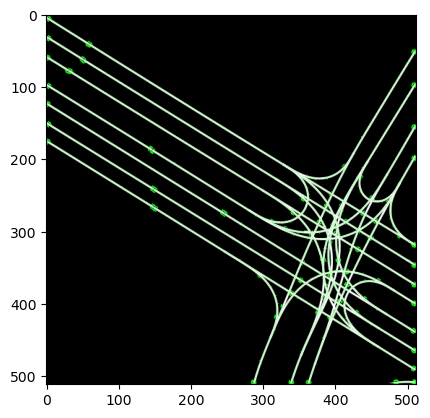

In [15]:
out_path = png_file.replace('.png', '.grid.png')
img_network = render_network(im, g, (0, 255, 0))

plt.imshow(img_network)
plt.show()

# img_network.show()
# print(f'Wrote {out_path}')

In [5]:
# fc = network_to_geojson(g)
# geojson_path = png_file.replace('.png', '.grid.geojson')
# with open(geojson_path, 'w') as out:
#     json.dump(fc, out)
# print(f'Wrote {geojson_path}')